In [13]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import json

In [14]:
image_path = "C:/Users/chuck/OneDrive/Desktop/Honors/Cell recognition.v1i.coco-segmentation/train/LRE504055180800401088_IMG_8667_JPG.rf.7883d4999676fda3261e631ae0eb0df9.jpg"
image = cv2.imread(image_path, 0)

json_path = "C:/Users/chuck/OneDrive/Desktop/Honors/Cell recognition.v1i.coco-segmentation/train/_annotations.coco.json"

# Opening JSON file
f = open(json_path)
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  
# Iterating through the json
# list
anots = []
for i in data['annotations']:
    anots.append(i["segmentation"][0])
f.close()

In [17]:
def draw_polygon(image, points, color=(255, 255, 255)):
    # Draw the filled polygon on the image
    return cv2.fillPoly(image, [points], color=color)
    # return cv2.polylines(image, [points], True, color)

image_cp = np.copy(image)*0
    

[[ 75  45]
 [128  45]
 [132  43]
 [132   8]
 [129   5]
 [ 76   6]
 [ 72   7]
 [ 71  43]]
[[194   8]
 [191   5]
 [137   5]
 [134   8]
 [133  43]
 [137  45]
 [190  45]
 [194  43]]
[[253  45]
 [256  43]
 [256   7]
 [254   5]
 [199   5]
 [196   8]
 [196  43]
 [199  45]]
[[314  45]
 [319  43]
 [318   7]
 [315   6]
 [261   6]
 [257   8]
 [258  43]
 [261  44]]
[[315  86]
 [318  84]
 [318  48]
 [315  46]
 [261  46]
 [257  48]
 [257  83]
 [261  85]]
[[252  46]
 [199  46]
 [195  48]
 [195  83]
 [199  85]
 [252  85]
 [256  84]
 [256  48]]
[[195 124]
 [198 127]
 [252 127]
 [256 125]
 [256  88]
 [253  87]
 [198  87]
 [195  88]]
[[261 127]
 [315 127]
 [319 125]
 [318  89]
 [315  87]
 [261  86]
 [257  88]
 [257 125]]
[[195 166]
 [197 168]
 [252 168]
 [256 166]
 [256 129]
 [252 127]
 [198 128]
 [195 130]]
[[319 130]
 [315 128]
 [261 127]
 [257 130]
 [257 166]
 [261 168]
 [314 168]
 [319 166]]
[[194 171]
 [194 207]
 [197 210]
 [252 210]
 [256 207]
 [256 171]
 [252 169]
 [197 169]]
[[194 249]
 [197 251]

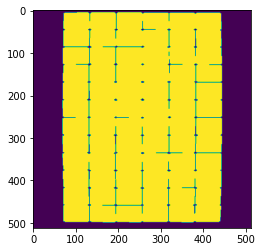

In [18]:
for i in range(len(anots)):
    x = np.array(anots[i][::2], np.int16)
    y = np.array(anots[i][1::2], np.int16)
    points = np.array(list(zip(x,y)), np.int32)
    print(points[:-1])
    image_cp = draw_polygon(image_cp, points[:-1], (255,255,255))

plt.imshow(image_cp)

In [ ]:
image_cp = np.copy(image)*0

for index, row in df.iterrows():
    print(row['c1'], row['c2'])

KeyError: 'c1'